## Matrice de termes

On voit dans ce notebook comment créer une matrice de termes à partir de notre corpus de termes, de manière à pouvoir faire tourner les modèles que l'on connaît par ailleurs sur des variables numériques.  

On charge les données nettoyées.

In [1]:
import pickle
import pandas as pd

cr_df_clean = pd.read_pickle('cr_df_clean.pkl')

On va créer la matrice de termes, en indiquant au logiciel d'enlever les mots-balise comme "le", "et",... Ces mots n'apportent en effet pas grand chose à l'analyse en général. problème : la fonction propose automatiquement d'enlever les mots balise anglais mais pas les français. On va donc récupérer une liste dans un module python : 

In [2]:
from stop_words import get_stop_words
french_stop_words = get_stop_words('french')
french_stop_words

['a',
 'ai',
 'aie',
 'aient',
 'aies',
 'ait',
 'alors',
 'as',
 'au',
 'aucun',
 'aura',
 'aurai',
 'auraient',
 'aurais',
 'aurait',
 'auras',
 'aurez',
 'auriez',
 'aurions',
 'aurons',
 'auront',
 'aussi',
 'autre',
 'aux',
 'avaient',
 'avais',
 'avait',
 'avant',
 'avec',
 'avez',
 'aviez',
 'avions',
 'avoir',
 'avons',
 'ayant',
 'ayez',
 'ayons',
 'bon',
 'car',
 'ce',
 'ceci',
 'cela',
 'ces',
 'cet',
 'cette',
 'ceux',
 'chaque',
 'ci',
 'comme',
 'comment',
 'd',
 'dans',
 'de',
 'dedans',
 'dehors',
 'depuis',
 'des',
 'deux',
 'devoir',
 'devrait',
 'devrez',
 'devriez',
 'devrions',
 'devrons',
 'devront',
 'dois',
 'doit',
 'donc',
 'dos',
 'droite',
 'du',
 'dès',
 'début',
 'dù',
 'elle',
 'elles',
 'en',
 'encore',
 'es',
 'est',
 'et',
 'eu',
 'eue',
 'eues',
 'eurent',
 'eus',
 'eusse',
 'eussent',
 'eusses',
 'eussiez',
 'eussions',
 'eut',
 'eux',
 'eûmes',
 'eût',
 'eûtes',
 'faire',
 'fais',
 'faisez',
 'fait',
 'faites',
 'fois',
 'font',
 'force',
 'furent',

On peut maintenant utiliser `CountVectorizer` pour faire notre matrice de termes avec nos mots balise français : 

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = french_stop_words)

# On fit_transform 
cr_cv = cv.fit_transform(cr_df_clean.texte)
cr_dtm = pd.DataFrame(cr_cv.toarray(), columns = cv.get_feature_names())
cr_dtm.index = cr_df_clean.index
cr_dtm

,abattait,accentué,acclamé,accordé,acte,adversaire,alex,allemand,aller,américain,...,voir,wiegman,zagallo,échoué,écrit,égalisé,énergie,équipe,états,éternité
CR hommes,1,1,0,1,1,2,0,1,1,0,...,0,0,1,1,1,1,1,3,0,1
CR femmes,0,0,1,1,0,0,4,0,0,1,...,1,1,0,0,0,0,0,0,1,0


On peut maintenant regarder quels sont les mots les plus utilisés pour chacun des compte-rendus : c'est aussi l'occasion de vérifier que notre nettoyage a bien été réalisé ou s'il nécessite quelques retouches.

In [4]:
# on transpose le df pour trier par mots les plus utilisés
dtm_analyse = cr_dtm.transpose()
dtm_analyse.head(20)

,CR hommes,CR femmes
abattait,1,0
accentué,1,0
acclamé,0,1
accordé,1,1
acte,1,0
adversaire,2,0
alex,0,4
allemand,1,0
aller,1,0
américain,0,1


In [5]:
# pour les femmes
dtm_analyse["CR femmes"].sort_values(ascending = False).head(20)

morgan         6
van            6
rapinoe        4
américaines    4
alex           4
gardienne      3
coup           3
match          3
but            3
gauche         3
pu             3
veenendaal     3
frappart       3
centres        3
stéphanie      3
penalty        3
compétition    3
face           3
plus           3
megan          3
Name: CR femmes, dtype: int64

Avec la librairie `wordcloud`, on peut faire une représentation graphique intéressante de ces résultats : 

__Exercice :__  
- Utilisez la fonction `WordCloud` pour faire un nuage de mots pour le compte-rendu de match femmes et un autre pour celui des hommes. Voyez-vous d'autres nettoyages de mots à faire?
- 
- 
- 
- 
- 
- 
- 
- 
-   
__On corrige ensemble :__

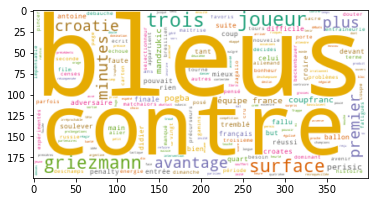

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(stopwords=french_stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

wc.generate(cr_df_clean.texte["CR hommes"])

plt.imshow(wc, interpolation="bilinear")
plt.show()

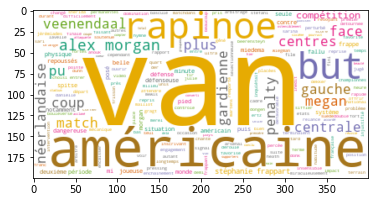

In [7]:
wc.generate(cr_df_clean.texte["CR femmes"])

plt.imshow(wc, interpolation="bilinear")
plt.show()

A minima, on peut enlever le "van", qui est un préfixe de beaucoup de noms néerlandais. Et mettre "megan rapinoe" dans le même nom. On peut aussi mettre "coup franc" dans un terme unique.

In [13]:
import re
def dernier_nettoyage(x):
    texte = re.sub(r"\bvan\W", " ", x)
    texte = re.sub("megan rapinoe", "rapinoe", texte)
    texte = re.sub("coup franc", "coupfranc", texte)
    texte = re.sub("américaines?", "américaine", texte)
    texte = re.sub(r"\Waprès\W", "", texte)
    return texte
cr_df_clean["texte"] = cr_df_clean.texte.apply(lambda x: dernier_nettoyage(x))
cr_df_clean.texte.loc["CR hommes"]

'pas besoin de se pincer pour y croire  l équipe de france a bien écrit ce dimanche une nouvelle page de son histoire  en dominant la croatie   au terme d une finale qui a tourné à son avantage en début de seconde période  les bleus ont réussi là où tous les autres favoris avaient échoué en russie  ce sacre est celui de la maîtrise    même si elle en a parfois manqué contre un adversaire qui lui a posé plus de problèmes qu on l aurait pensé c est aussi celui de didier deschamps  son sélectionneur porte bonheur  le troisième seulement à soulever la coupe en tant que joueur et entraîneurle brésilien zagallo et l allemand beckenbauer  il y avait les précurseurs expérimentés en   vingt ans ce sont des gamins qui ont réussi l impensable  l avenir leur appartient le film du matchalors qu on aurait cru les français décidés à aller au carton d entrée  pour faire douter des croates censés être plus fatigués par leur débauche d énergie des tours précédents   trois prolongations en es  quarts et 

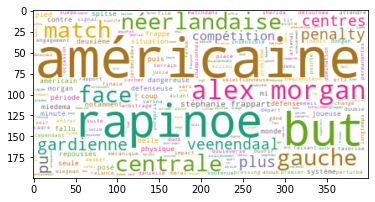

In [14]:
wc.generate(cr_df_clean.texte["CR femmes"])

plt.imshow(wc, interpolation="bilinear")

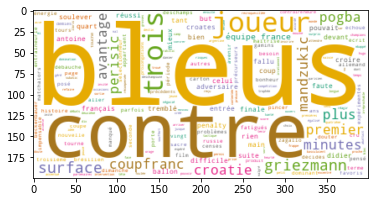

In [15]:
wc.generate(cr_df_clean.texte["CR hommes"])

plt.imshow(wc, interpolation="bilinear")